In [2]:
import librosa
import numpy as np 
import matplotlib.pyplot as plt 
from librosa import display 
from IPython.display import Audio

In [3]:
y,sr = librosa.load(librosa.example('nutcracker'))

In [4]:
Audio(data= y, rate=sr)

In [5]:
print(y,sr)

[ 2.2716861e-06  5.3327212e-06 -7.2473290e-06 ...  1.1170751e-05
  1.2871884e-06  5.4120619e-06] 22050


In [6]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers 


2022-01-25 11:44:58.646244: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-25 11:44:58.646286: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [7]:
tf.keras.layers.Dense(
    units,
    activation=None,
    use_bias=True,
    kernel_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs
)

NameError: name 'units' is not defined

In [8]:
librosa.feature.chroma_stft(y=y, sr=sr)

array([[1.        , 0.96180177, 0.7336141 , ..., 0.13945058, 0.14320856,
        0.2775352 ],
       [0.6876063 , 0.744938  , 0.59920007, ..., 0.12660551, 0.10303444,
        0.16232267],
       [0.91423744, 1.        , 1.        , ..., 0.2596749 , 0.17344482,
        0.2919754 ],
       ...,
       [0.6561969 , 0.79270554, 0.65428764, ..., 0.0655442 , 0.09702651,
        0.21360835],
       [0.4678204 , 0.59790653, 0.83328664, ..., 0.21253023, 0.17957981,
        0.34192863],
       [0.6813389 , 0.7018474 , 0.9613534 , ..., 0.6640443 , 0.5531143 ,
        1.        ]], dtype=float32)

[Text(0.5, 1.0, 'Chromogram')]

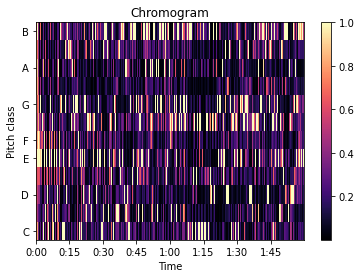

In [9]:
s = np.abs(librosa.stft(y))
chroma = librosa.feature.chroma_stft(y=y, sr=sr)
fig,ax = plt.subplots()
img = display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title= "Chromogram")


In [10]:
chroma_stf = librosa.feature.chroma_stft(y=y, sr=sr, n_chroma=12, n_fft= 4096)

In [11]:
chroma_cens = librosa.feature.chroma_cens(y=y,sr=sr)
chroma_cq = librosa.feature.chroma_cqt(y=y, sr=sr)

Waveform chromagram – it is basically a chromagram that is computed from the power spectrogram of the audio files. It classifies the waveform of the sound in different pitch classes.

Constant-Q chromagram– it is a chromagram of constant-Q transform signal. This transformation of the signal takes part in the frequency domain and is related to the Fourier Transform and Morlet Wavelet Transform.

Chroma energy normalized statistics(CENS) chromagram–



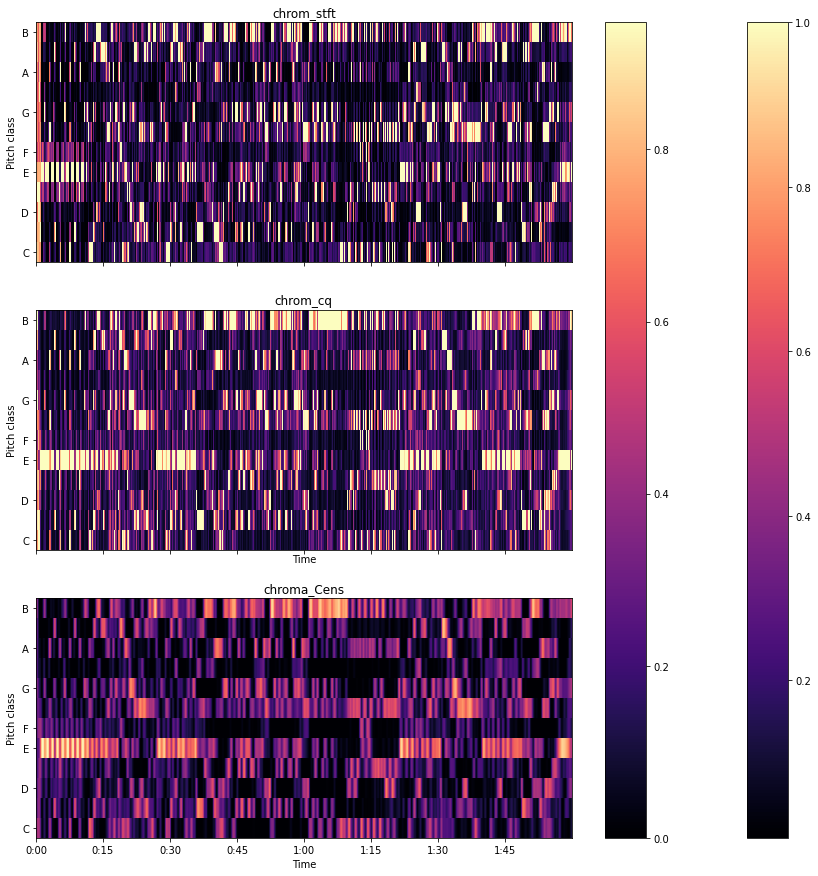

In [12]:
fig,ax = plt.subplots(nrows=3, sharex=True, sharey=True,figsize=(15,15))
display.specshow(chroma_stf, y_axis='chroma', x_axis='time', ax=ax[0])
ax[0].set(title='chrom_stft')
ax[0].label_outer()
img = display.specshow(chroma_cq, y_axis='chroma', x_axis='time', ax=ax[1])
ax[1].set(title= 'chrom_cq' )
fig.colorbar(img, ax=ax)
img1 = display.specshow(chroma_cens, y_axis= 'chroma', x_axis='time', ax=ax[2])
ax[2].set(title='chroma_Cens')
fig.colorbar(img1, ax=ax)

In [14]:
librosa.feature.melspectrogram(y=y, sr=sr)
D= np.abs(librosa.stft(y))**2
S = librosa.feature.melspectrogram(S=D, sr=sr)

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

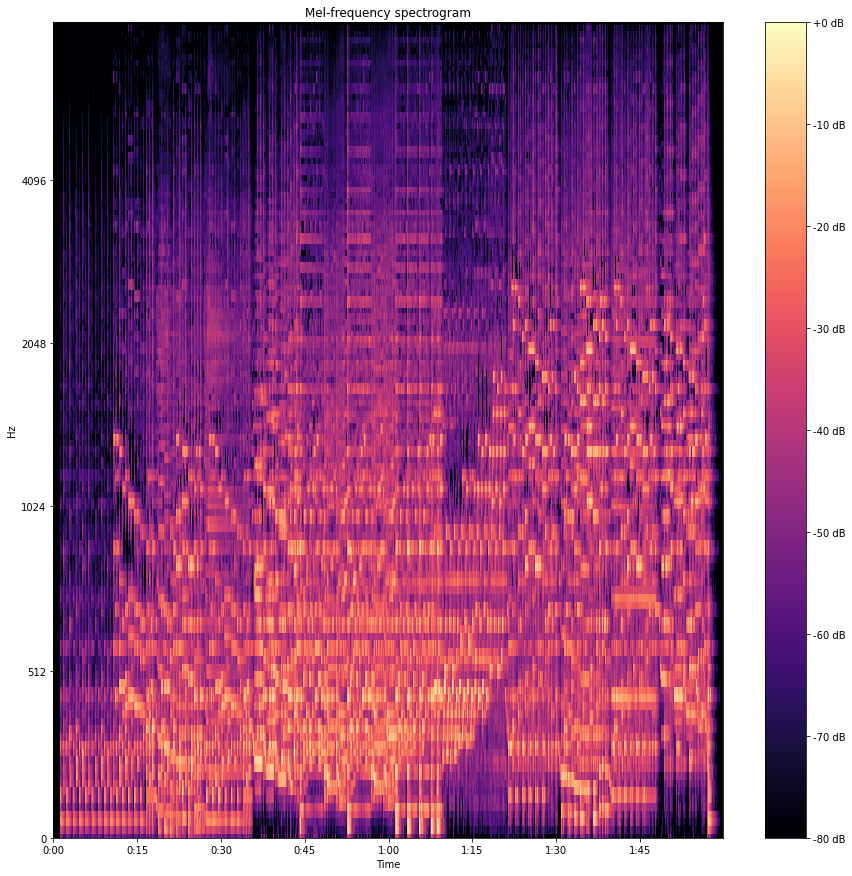

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,15))
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

In [17]:
mfccs = librosa.feature.mfcc(y = y, sr=sr, n_mfcc= 40)

[Text(0.5, 1.0, 'MFCC')]

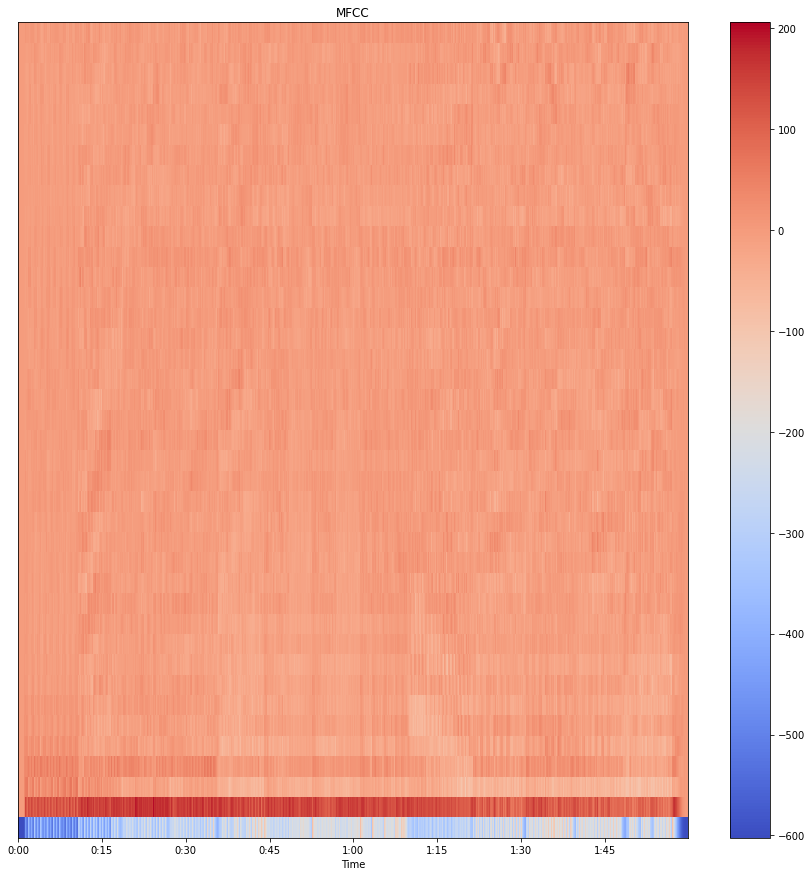

In [23]:
fix,ax = plt.subplots(figsize = (15,15))
img = librosa.display.specshow(mfccs, x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title = 'MFCC')

[Text(0.5, 1.0, 'log Power spectrogram')]

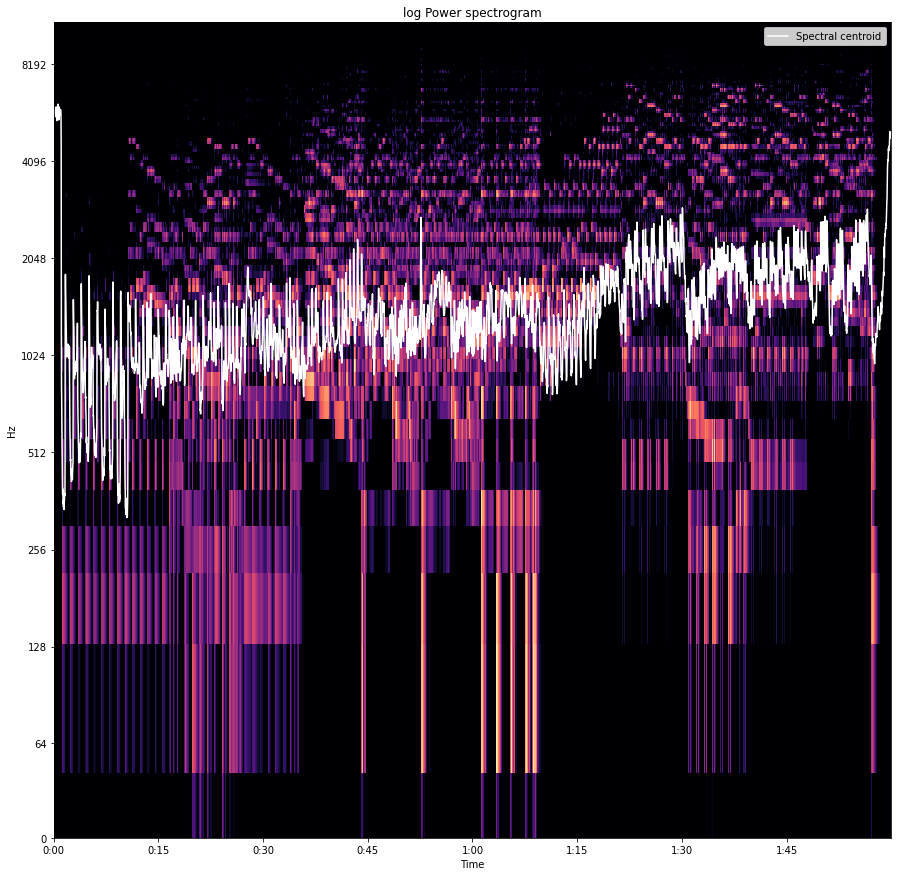

In [30]:
ccent = librosa.feature.spectral_centroid(y=y, sr=sr)
times = librosa.times_like(cent)
fig, ax = plt.subplots(figsize=(15,15))
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(times, cent.T, label='Spectral centroid', color='w')
ax.legend(loc='upper right')
ax.set(title='log Power spectrogram')

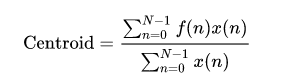

x(n) is the weight frequency value 
n is the bin number 
f(n) is the centre frequency of the bin 
